# Exploratory Data Analysis

In [1]:
from pathlib import Path
import os
import numpy as np
import pandas as pd


cwd = os.getcwd()
path = Path(cwd)
path = path.parent.absolute()

listings = pd.read_csv(str(path) + '\data\\listings.csv')

reviews = pd.read_csv(str(path) + '\data\\reviews.csv')

## Answering the project questions.

1. How many samples and features does each file have?

In [2]:
print(f'"listings.csv" has {listings.shape[0]} samples and {listings.shape[1]} features.')

print(f'"reviews.csv" has {reviews.shape[0]} samples and {reviews.shape[1]} features.')

"listings.csv" has 9582 samples and 67 features.
"reviews.csv" has 406607 samples and 6 features.


2. What are the types of your features?

In [3]:
# Data types for 'listings.csv'.
listings_types, listings_typecounts = np.unique(listings.dtypes.values, return_counts = True)

print('Data types for "listings.csv":')
for i in range(len(listings_types)):
    print(f'Features with data type {listings_types[i]}: {listings_typecounts[i]}')

# Data types for all 'reviews.csv'.
reviews1_types, reviews1_typecounts = np.unique(reviews1.dtypes.values, return_counts = True)

print('\nData types for all reviews csv files:')
for i in range(len(reviews1_types)):
    print(f'Features with data type {reviews1_types[i]}: {reviews1_typecounts[i]}')



Data types for "listings.csv":
Features with data type int64: 21
Features with data type float64: 12
Features with data type object: 34

Data types for all reviews csv files:
Features with data type int64: 3
Features with data type object: 3


3. Are there any missing values? If yes, how many and how many rows are
affected?

In [4]:
# Total missing values.
total_samples = listings.shape[0]
total_values = listings.count()

total_missing_values = (total_samples - total_values).sum()

print(f'Total missing values: {total_missing_values}')

# Number of affected rows.
total_features = listings.shape[1]
total_values_rows = listings.count(axis = 1)

total_affected_rows = ((total_features - total_values_rows) > 0).sum()

print(f'Total affected rows: {total_affected_rows}')

# Features with missing values.
has_missing_values = total_values != total_samples

has_missing_values.index[0]

features_with_missing = [feature for feature in has_missing_values.index if has_missing_values[feature]]

print(f'{len(features_with_missing)} features with missing values:')
print(features_with_missing)


Total missing values: 56123
Total affected rows: 9582
29 features with missing values:
['name', 'description', 'neighborhood_overview', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'calendar_updated', 'first_review', 'last_review', 'license', 'reviews_per_month']


4. How many listings per neighbourhood are there?

In [5]:
print('Total listings per neighbourhood:')
listings.neighbourhood_cleansed.value_counts()

Total listings per neighbourhood:


ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1866
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  841
ΝΕΟΣ ΚΟΣΜΟΣ                          713
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             699
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     599
ΠΑΓΚΡΑΤΙ                             383
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      381
ΚΟΛΩΝΑΚΙ                             330
ΑΜΠΕΛΟΚΗΠΟΙ                          329
ΑΚΡΟΠΟΛΗ                             319
ΘΗΣΕΙΟ                               294
ΚΕΡΑΜΕΙΚΟΣ                           244
ΣΤΑΔΙΟ                               223
ΠΕΤΡΑΛΩΝΑ                            214
ΚΥΨΕΛΗ                               201
ΙΛΙΣΙΑ                               172
ΓΟΥΔΙ                                162
ΖΑΠΠΕΙΟ                              141
ΛΥΚΑΒΗΤΤΟΣ                           117
ΠΑΤΗΣΙΑ                              117
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     116
ΝΙΡΒΑΝΑ                              105
ΓΚΥΖΗ                                 88
ΚΟΛΩΝΟΣ                               82
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ 

5. How many listings per room type are there?

In [6]:
print('Total listings per room type:')
listings.room_type.value_counts()

Total listings per room type:


Entire home/apt    8463
Private room        891
Hotel room          138
Shared room          90
Name: room_type, dtype: int64

6. How many listings per room number are there?

In [7]:
print('Total listings per bedroom number:')
listings.bedrooms.value_counts()

Total listings per bedroom number:


1.0     5483
2.0     2579
3.0      507
4.0      132
5.0       29
6.0       28
10.0       5
7.0        4
9.0        1
12.0       1
Name: bedrooms, dtype: int64

7. What is the distribution of listings per host? What are the most listings
that a single host has?

<AxesSubplot:title={'center':'Distribution of listings per host'}, xlabel='Number of listings per host', ylabel='Number of hosts'>

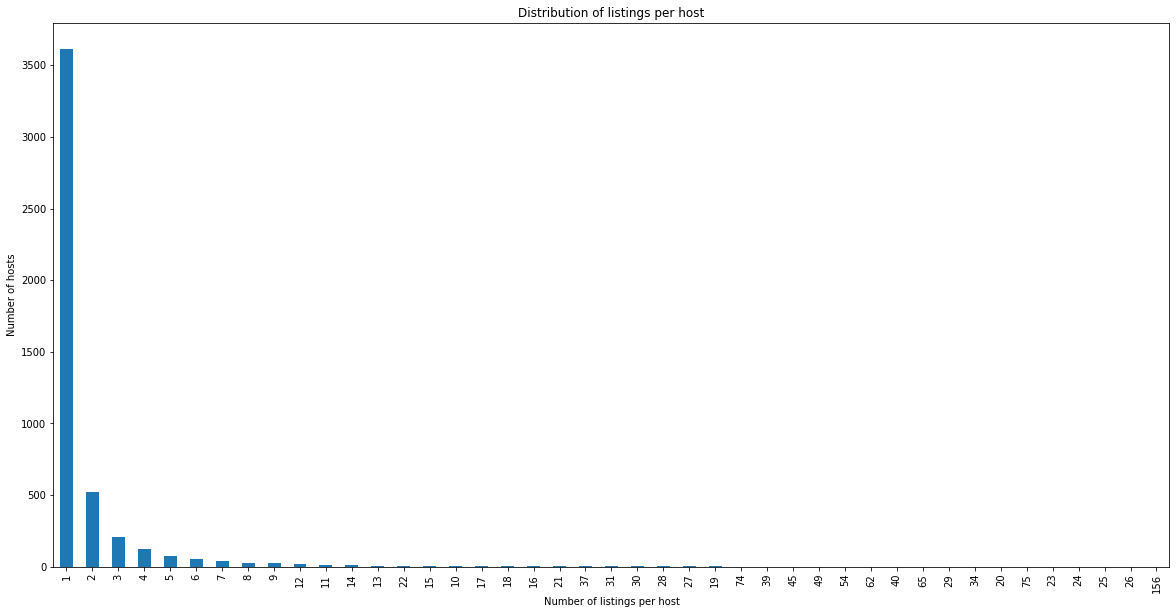

In [8]:
# Distribution of listings per host.
listings_per_host = listings.host_id.value_counts()

number_of_listings_count = listings_per_host.value_counts()

number_of_listings_count.plot.bar(figsize = (20,10), title = 'Distribution of listings per host', xlabel = 'Number of listings per host', ylabel = 'Number of hosts')

In [9]:
# Most listings a single host has.
print(f'Most listings a single host has: {listings_per_host.iloc[0]}')

Most listings a single host has: 156


8. When was the first host registered?

In [10]:
host_since_date = pd.to_datetime(listings.host_since)
earliest_host = host_since_date.sort_values()[0]

print(f'First host wass registered on: {earliest_host}')

First host wass registered on: 2009-09-08 00:00:00


9. What year had the most hosts registered?

In [11]:
host_since_year = [pd.to_datetime(date).year for date in host_since_date.values]

host_registered_per_year = pd.Series(host_since_year).value_counts()
host_registered_per_year

print(f'Most hosts registered on {host_registered_per_year.index[0]}')

Most hosts registered on 2018.0


10. How many identified hosts are there? What is their percentage over all
hosts?

In [12]:
total_hosts = listings.host_id.nunique()
total_verified_hosts = listings.loc[listings.host_identity_verified == 't'].host_id.nunique()

print(f'The total number of verified hosts is: {total_verified_hosts}')
print(f'The percentage of verified hosts is: {(total_verified_hosts / total_hosts) * 100 : .2f}%')

The total number of verified hosts is: 2830
The percentage of verified hosts is:  58.96%


11. What are the top-20 most common amenities provided by the hosts?

In [13]:
# Analysis of amenities.

# Process amenities column.
amenities = listings.amenities

cleaned_amenities = []                          # Initialize list for the amenities of all listings.
for i in range(len(amenities)):                 # For each listing.
    current = amenities[i]                      # Get its amenities.

    current = current[1:-2].split(sep = ',')    # Remove leading and trailing bracket from string, and separate it by the commas.

    cleaned = []
    for amenity in current:                     # For each amenity in the list.
        amenity = amenity.replace('"', '')      # Remove double quote characters.
        amenity = amenity.lstrip()              # Remove leading white space.
        
        cleaned.append(amenity)                 # Add amenity to the cleaned list.

    cleaned_amenities.append(cleaned)           # Add list to overall list.
    
amenities = pd.Series(cleaned_amenities)        # Create a Series of the list.

listings.amenities = amenities                  # Replace amenities column in dataframe.

<AxesSubplot:title={'center':'Most popular amenities'}, xlabel='Amenity', ylabel='Number of listings with amenity'>

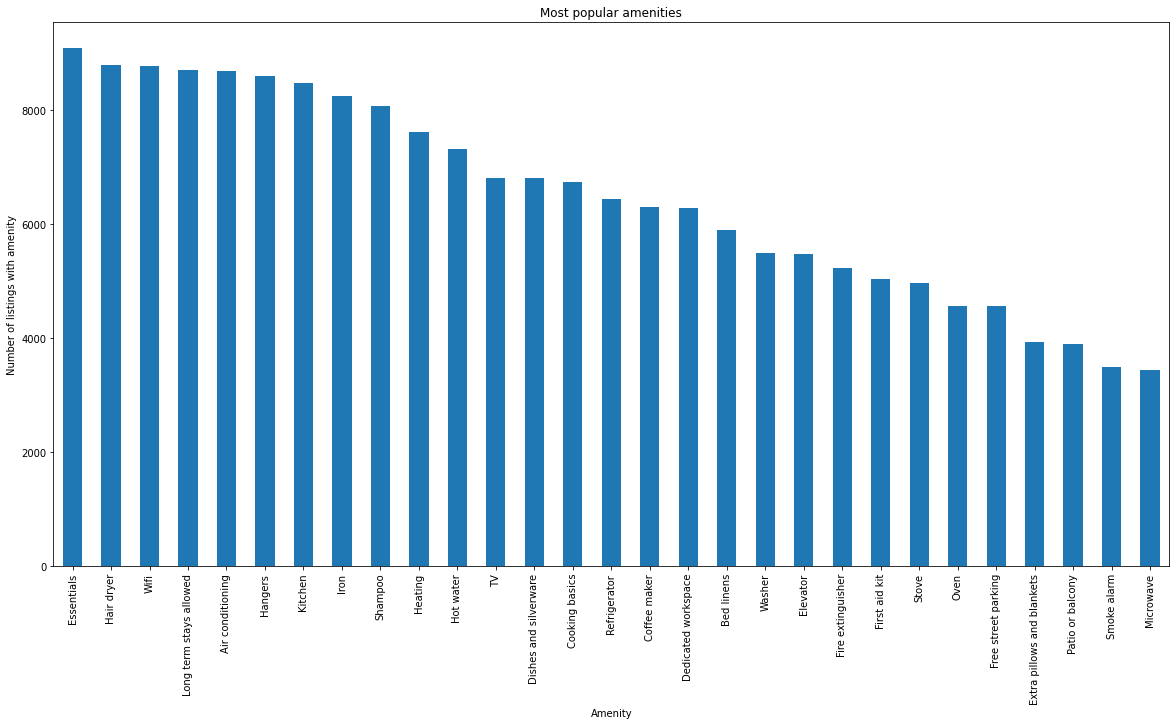

In [14]:
# Calculate counts of each amenity.
amenity_counts = {}
for amenities in listings.amenities:
    for amenity in amenities:
        
        if amenity in amenity_counts.keys():
            amenity_counts[amenity] += 1
        else:
            amenity_counts[amenity] = 1

# Keep most popular amenities.
amenity_counts = pd.Series(amenity_counts).sort_values(ascending = False)
popular_count = 3000                                                            # The amount of times an amenity has to appear to be considered popular.
most_popular_amenities = amenity_counts[amenity_counts > popular_count]

# Plot them in descending order.
most_popular_amenities.plot.bar(figsize = (20,10), title = 'Most popular amenities', xlabel = 'Amenity', ylabel = 'Number of listings with amenity')

In [15]:
# Most popular amenities.
print('The 20 most popular amenities in descending order are:')
print(most_popular_amenities[:19].index)

The 20 most popular amenities in descending order are:
Index(['Essentials', 'Hair dryer', 'Wifi', 'Long term stays allowed',
       'Air conditioning', 'Hangers', 'Kitchen', 'Iron', 'Shampoo', 'Heating',
       'Hot water', 'TV', 'Dishes and silverware', 'Cooking basics',
       'Refrigerator', 'Coffee maker', 'Dedicated workspace', 'Bed linens',
       'Washer'],
      dtype='object')


12. What is the distribution of price for each room type?

<AxesSubplot:title={'center':'Price distribution for room type: Entire home/apt'}, ylabel='Frequency'>

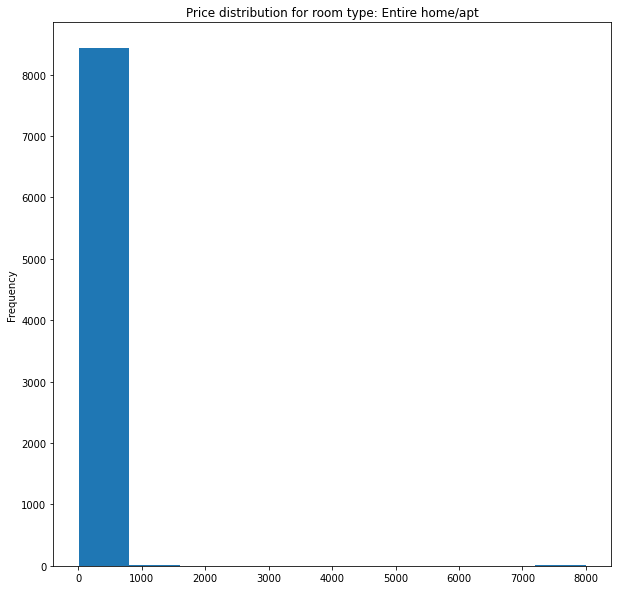

In [16]:
# Clean price feature.
listings.price = listings.price.apply(lambda x : float(x[1:].replace(',', '')))

room_types = listings.room_type.unique()

# Entire home/apt.
room = room_types[0]
room_type_price = listings.loc[listings.room_type == room].price

room_type_price.plot.hist(figsize = (10,10), title = f'Price distribution for room type: {room}')

<AxesSubplot:title={'center':'Price distribution for room type: Private room'}, ylabel='Frequency'>

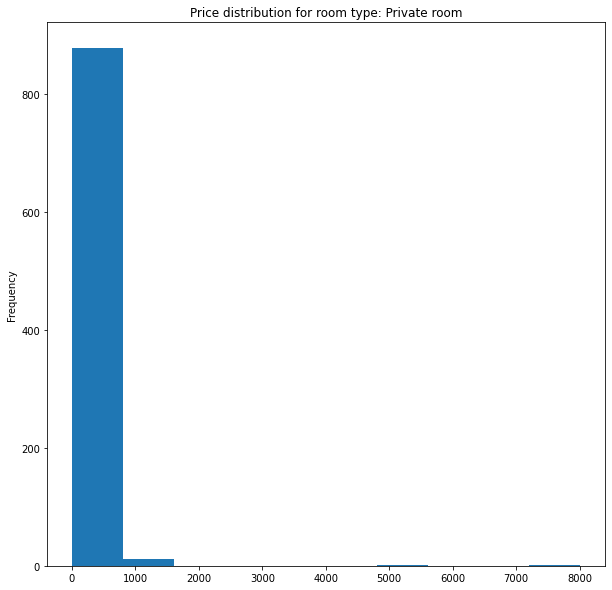

In [17]:
# Private room.
room = room_types[1]
room_type_price = listings.loc[listings.room_type == room].price

room_type_price.plot.hist(figsize = (10,10), title = f'Price distribution for room type: {room}')

<AxesSubplot:title={'center':'Price distribution for room type: Shared room'}, ylabel='Frequency'>

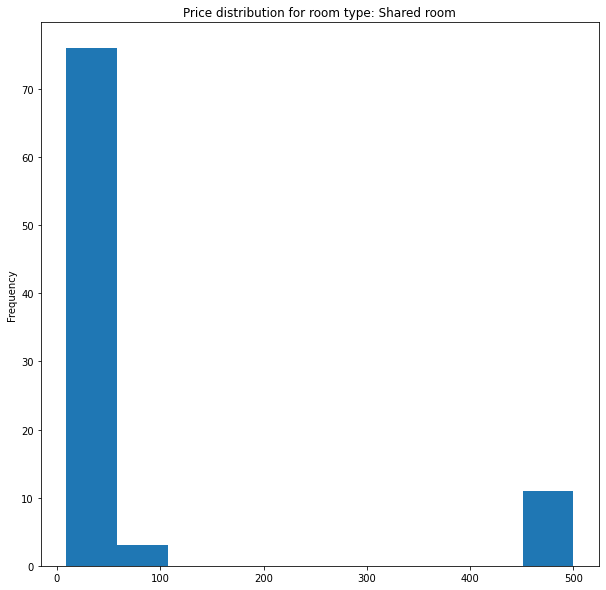

In [18]:
# Shared room.
room = room_types[2]
room_type_price = listings.loc[listings.room_type == room].price

room_type_price.plot.hist(figsize = (10,10), title = f'Price distribution for room type: {room}')

<AxesSubplot:title={'center':'Price distribution for room type: Hotel room'}, ylabel='Frequency'>

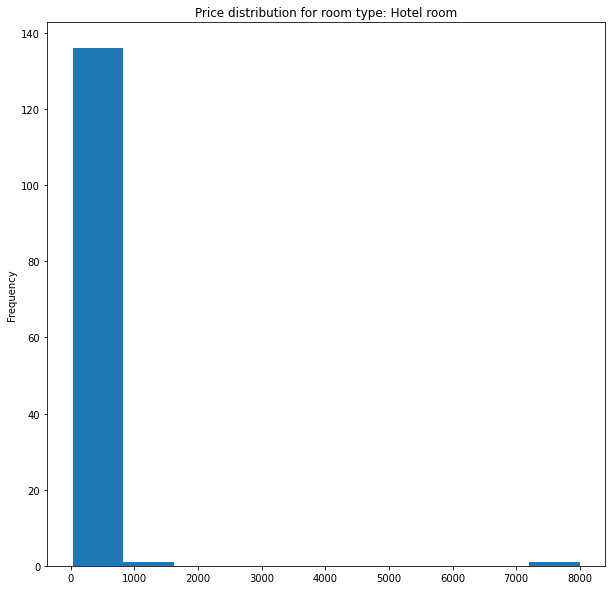

In [19]:
# Hotel room.
room = room_types[3]
room_type_price = listings.loc[listings.room_type == room].price

room_type_price.plot.hist(figsize = (10,10), title = f'Price distribution for room type: {room}')

13. How many ratings do I have?

In [2]:
print('Ratings for each Listing ID:')
reviews.listing_id.value_counts()

Ratings for each Listing ID:


1177492     745
3431705     663
13553080    584
14583913    581
5025556     574
           ... 
43805075      1
19025571      1
18997790      1
18952818      1
52810712      1
Name: listing_id, Length: 7874, dtype: int64

14. Do all listings have ratings?

In [3]:
listings_reviewed = reviews.listing_id.nunique()

print(f'Percentage of listings that have reviews: {(listings_reviewed / listings.shape[0]) * 100 :.2f}%')

Percentage of listings that have reviews: 82.17%


## Further analysis

### Analyze amenities
Compare three methods of processing:

1. Count the total amenities the listing has.

In [22]:
listings['total_amenities'] = listings.amenities.apply(lambda x : len(x))
listings.total_amenities

0       33
1       33
2       30
3       32
4       33
        ..
9577    20
9578     4
9579    31
9580    33
9581    30
Name: total_amenities, Length: 9582, dtype: int64

2. Count the amount of popular amenities the listing has.

In [23]:
count_popular_amenities = []

for amenities in listings.amenities:
    count = 0
    for amenity in amenities:
        if amenity in most_popular_amenities:
            count += 1
    
    count_popular_amenities.append(count)


listings['popular_amenities'] = count_popular_amenities

listings.popular_amenities

0       21
1       23
2       19
3       19
4       22
        ..
9577    16
9578     1
9579    21
9580    22
9581    22
Name: popular_amenities, Length: 9582, dtype: int64

3. Calculate a score based on the importance of each amenity for each listing.

In [24]:
amenity_rating = [ ['Long term stays allowed'],   # Rating of 1.
                   ['Iron', 'Dedicated workspace'],   # Rating of 2.
                   ['Hangers', 'TV', 'Dishes and silverware', 'Coffee maker', 'Washer'],   # Rating of 3.
                   ['Wifi', 'Hair dryer', 'Air conditioning', 'Cooking basics', 'Bed linens'],   # Rating of 4.
                   ['Essentials', 'Kitchen', 'Shampoo', 'Heating', 'Hot water', 'Refrigerator']   # Rating of 5.
]

amenities_score = []

for amenities in listings.amenities:
    score = 0
    for amenity in amenities:
        for i in range(len(amenity_rating)):
            if amenity in amenity_rating[i]:
                score += i + 1
    
    amenities_score.append(score)


listings['amenities_score'] = amenities_score

listings.amenities_score

0       58
1       61
2       56
3       53
4       58
        ..
9577    50
9578     1
9579    65
9580    70
9581    65
Name: amenities_score, Length: 9582, dtype: int64

Compare the three methods using Mutual Information score.

In [25]:
from sklearn.feature_selection import mutual_info_regression

# X = listings[['total_amenities', 'popular_amenities', 'amenities_score']]
# y = listings.price

X = listings[listings.price < 200][['total_amenities', 'popular_amenities', 'amenities_score']]
y = listings[listings.price < 200].price

for i in range(100):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name = 'MI Scores', index = X.columns)    

    if i == 0:
        mi_scores_avg = mi_scores
    else:
        mi_scores_avg = mi_scores_avg + mi_scores

mi_scores_avg = mi_scores_avg.sort_values(ascending = False)
mi_scores_avg = mi_scores_avg / 100

print('Features and their MI scores:')
print(mi_scores_avg)

Features and their MI scores:
total_amenities      0.037196
popular_amenities    0.024103
amenities_score      0.023690
Name: MI Scores, dtype: float64


### Analyze bathrooms

In [26]:
# Fill NaN values with 0, assuming the listing has no bath.
listings.bathrooms_text.fillna(value = '0 baths', inplace = True)

# Create three new columns.
bathrooms = []                  # 'bathrooms' will hold the amount of bathrooms the listing has. 
shared_bath = []                # 'shared_bath' for if the bathrooms are shared.
half_bath = []                  # 'half_bath' for if the listing has a half_bath.

for text in listings.bathrooms_text:
    text = text.lower()

    if 'shared' in text:
        shared_bath.append(True)
    else:
        shared_bath.append(False)
    
    if 'half-bath' in text:
        half_bath.append(True)


    text = text.split()

    try:
        baths = float(text[0])
        bathrooms.append(int(baths))

        if baths.is_integer():            
            half_bath.append(False)
        else:
            half_bath.append(True)
    except:
        bathrooms.append(0)

listings['bathrooms'] = bathrooms
listings['shared_bath'] = shared_bath
listings['half_bath'] = half_bath

### Analyze price outliers

In [28]:
# Outliers in price column alter the data.
price_threshold = 200

print(f'{( (listings.shape[0] - listings[listings.price <= price_threshold].shape[0]) / listings.shape[0] ) * 100 : .2f}%')

 3.75%


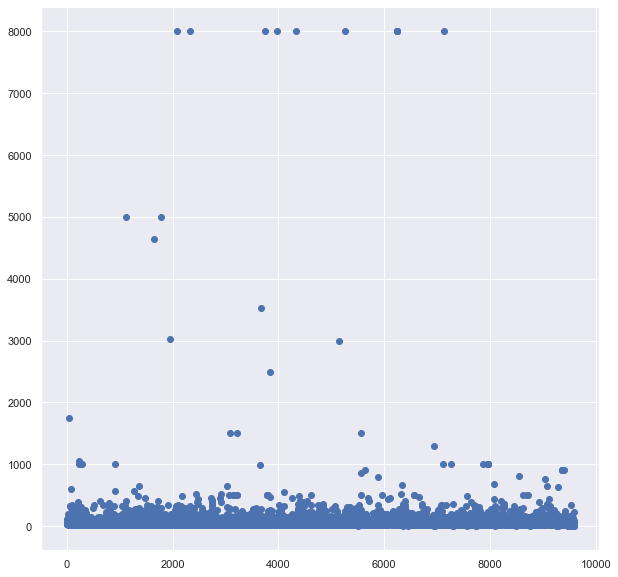

In [52]:
from matplotlib import pyplot as plt
import seaborn as sns

#Visualizing outliers
sns.set(rc={"figure.figsize":(10, 10)})
plt.scatter(x = range(listings.shape[0]), y = listings.price)

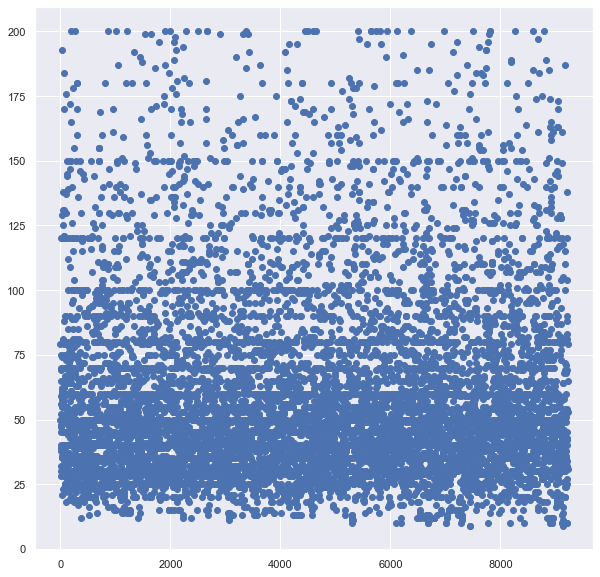

In [53]:
plt.scatter(x = range(listings[ listings.price <= price_threshold ].shape[0]), y = listings[ listings.price <= price_threshold ].price)

(0.0, 200.0)

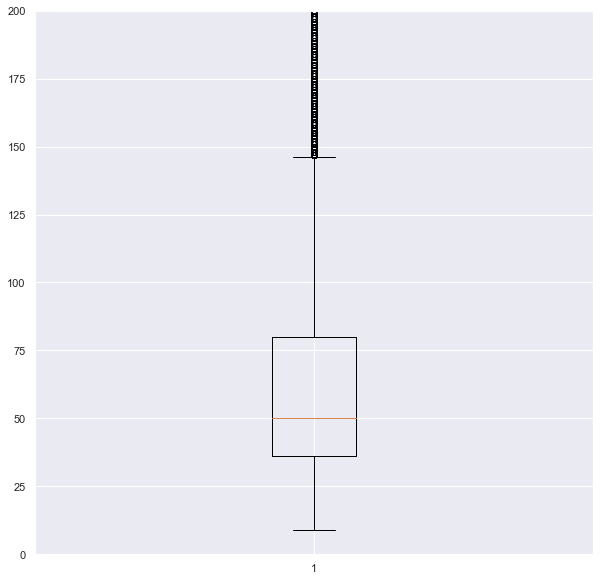

In [55]:
plt.boxplot(listings.price)
plt.ylim([0, price_threshold])

### Analyze coordinates

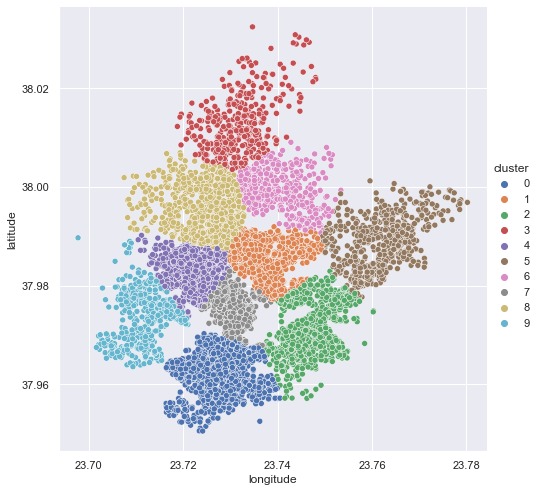

In [56]:
import seaborn as sns
from sklearn.cluster import KMeans


cluster_num = 10

X = listings[listings.price < price_threshold][['latitude', 'longitude']]

# Create clusters with K-Means.
kmeans = KMeans(n_clusters = cluster_num)
X['cluster'] = kmeans.fit_predict(X)
X['cluster'] = X['cluster'].astype('category')

# Visualize.
sns.relplot(x = 'longitude', y = 'latitude', hue = 'cluster', data = X, height = 7, aspect = 1)

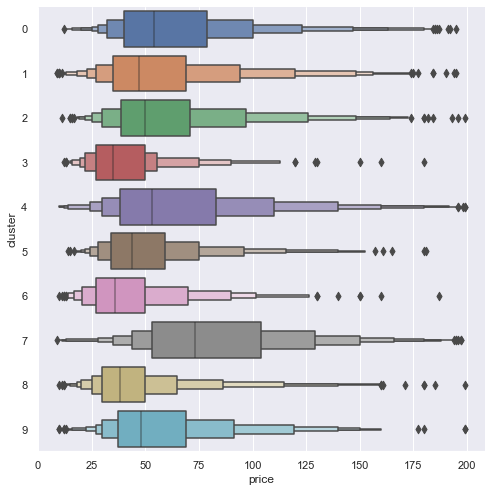

In [58]:
#Price distribution for each cluster.
X['price'] = listings[listings.price < price_threshold].price

sns.catplot( x = 'price', y = 'cluster', data = X, kind = 'boxen', height = 7)

In [184]:
# Calculate MI for coordinates and cluster.
mi_X = X[['latitude', 'longitude', 'cluster']]
mi_y = X['price']

for i in range(100):
    mi_scores = mutual_info_regression(mi_X, mi_y)
    mi_scores = pd.Series(mi_scores, name = 'MI Scores', index = mi_X.columns)    

    if i == 0:
        mi_scores_avg = mi_scores
    else:
        mi_scores_avg = mi_scores_avg + mi_scores

mi_scores_avg = mi_scores_avg.sort_values(ascending = False)
mi_scores_avg = mi_scores_avg / 100

print('Features and their MI scores:')
print(mi_scores_avg)

Features and their MI scores:
cluster      0.207730
latitude     0.163965
longitude    0.089992
Name: MI Scores, dtype: float64


### Other

In [191]:
# Percentage of listings with reviews -> fill NaNs with zeros.
print(f'{( listings.reviews_per_month.count() / listings.shape[0] ) * 100 : .2f}%')

 82.17%


In [201]:
# Maybe good for ordinal encoding.
listings.room_type.value_counts()

Entire home/apt    8463
Private room        891
Hotel room          138
Shared room          90
Name: room_type, dtype: int64

In [245]:
# Maybe drop.
listings.property_type.nunique()

49

In [200]:
# Maybe keep beds only because of very few NaN values.
print(f'Non NaN samples for "beds" column: {listings.beds.count()}')
print(f'Non NaN samples for "bedrooms" column: {listings.bedrooms.count()}')

Non NaN samples for "beds" column: 9514
Non NaN samples for "bedrooms" column: 8769


In [216]:
# If host_response_time is NaN so is host_response_rate. Maybe fill NaNs with 'Doesn't respond' and 0 respectively.
L1 = listings[ ~listings.host_response_time.isna() ].id
L2 = listings[ ~listings.host_response_rate.isna() ].id

(L1 == L2).all()

True

In [218]:
# Good for ordinal encoding.
listings.host_response_time.value_counts()

within an hour        5967
within a few hours     641
within a day           403
a few days or more     327
Name: host_response_time, dtype: int64

In [224]:
# Only 3 different samples between these, maybe drop one
(listings.host_listings_count == listings.host_total_listings_count).sum()

9579